# <center>Lab 7: Motion of Charged Particles Computational Lab</center>

_Name:_

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.optimize import curve_fit
from ipywidgets import widgets, Style, HBox
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
from IPython.display import clear_output

# <font color=Black>Introduction</font>

**<font color=Black>In the previous lab, you investigated an experiment to measure the velocity of an electron using crossed electric and magnetic fields. In this lab, we will simulate the last lab to show how the alignment of the measurement devices can impact your results.</font>**

**<font color=Black>Simulating measurement apparatuses to determine how they will work and what kinds of results you should expect is extremely common in both physics and engineering, especially for precision instruments. In physics, it is typical for an experimentalist to model all of the components of a complicated experimental device, input some (fake) measurement signal, and then determine the output. The same thing happens in engineering, where a complicated machine is modeled computationally, and then external stresses are applied so that the tolerances of the gadget can be measured.</font>**

## <font color=Black>What You Will Do Today</font>

**<font color=Black>We've provided you with some example code that will shoot an electron across an empty region before reaching the end of the Mica sheet. The electron's position and time of flight when it reaches the end of the Mica sheet is displayed. You will need to add a force component for both the electric and magnetic field (both of which are vectors). Once you've completed this task, and you're satisfied your code accurately models a particle moving through a crossed electric and magnetic field, you will then adjust the orientation of the electric and magnetic fields, to determine the effects of misalignment on your measurements. Finally, you will write a brief note explaining your results and your recommendations regarding the degree to which the instruments will need to be calibrated.</font>**

## <font color=Black>What You Will Be Graded On.</font>

**<font color=Black>In the first part of the assignment, you will need to come up with a means of calculating the force exerted on a particle from both an electric and magnetic field. Before moving on, ensure that your code successfully models the forces exerted by an Electric and Magnetic field.</font>**

**<font color=Black>In the second part of the assignment, you will need to come up with a way to measure the effects of misalignment. You will produce graphs that illustrate the effects of misalignment on your measurements.</font>**

**<font color=Black>In the third and final part of the lab, you will write a short note to Michelle, the lab coordinator, explaining both your simulation and your recommendations for the degree to which instruments should be calibrated.</font>**

# <font color=Black>Part One: Simulating Electric and Magnetic Fields</font>

**<font color=Black>We will begin by completing a piece of code similar to what we did in the pre-lab. The following code splits the simulation and plotting into two parts. Your job is to code the electric field force and magnetic field force and test the simulation.</font>**

<strong><font color=A07A06> Code Task 7.1: Complete the functions `get_E_field_force` and `get_B_field_force` and test your simulation. The preset initial conditions have been selected to simulate the experiment on the E-field only configuration. If you code the forces correctly, the plot should match what was observed during the previous lab.</font></strong>

In [ ]:
q_e = -1.6e-19 #charge in C
m_e = 9.11e-31 #mass of electron in kg
L_0 = 0.1 #distance to screen in m
dt = 5.0e-12 #time step in s
v_e = 3e7 # electron velocity in m/s


###################################################
    ### Edit: Complete these functions ###
    # The electron charge has been pre-defined, q_e
def get_E_field_force(E_field_vec):
    # Force on charge due to electric field
    F_E =
    return F_E

def get_B_field_force(B_field_vec, velocity):
    # Force on charge due to magnetic field using np.cross(),
    # e.g. np.cross(a,b) to take the cross product of vectors a and b
    F_B =
    return F_B
    ### Finish Edit ###
########################################################
    
#This function takes in E and B field vectors, simulates the particle trajectory using the 
#force equations defined above, and returns the x, y, z, and t values for the simulation
def run_particle_simulation(E_field_vec, B_field_vec,verbose=True,mis_print=False):
    x_val = np.array([0.0,0,0])   #initial position vector of particle in m
    v_val = np.array([v_e,0,0]) #initial velocity vector of particle in m/s
    t = 0.0
    x_vals, y_vals, z_vals = [],[],[]
    t_vals = []
    Niter = 0
    
    retrograde = 0 #count number of times particle has looped backwards
    prograde = True # check to see if particle is moving forward again
    current_retro = 0
    
    while (x_val[0] < L_0) and (Niter<1.0e7):
        F_net = get_E_field_force(E_field_vec) + get_B_field_force(B_field_vec,v_val)
        delta_v = F_net*dt/m_e
        v_val += delta_v
        x_val += v_val*dt
        t += dt
        Niter += 1
        x_vals.append(x_val[0])
        y_vals.append(x_val[1])
        z_vals.append(x_val[2])
        t_vals.append(t)
        
        if prograde: # if we were moving forward
            if x_val[0] < max(x_vals): # and we start moving backwards
                prograde = False # we are no longer moving forward
                retrograde += 1 # count number of times
        else: # if we were not moving forward
            #print('still backwards')
            if x_val[0] >= max(x_vals): # and we begin to advance again
                prograde = True
        
        if retrograde == 5 and retrograde > current_retro: 
            print('Particle is looping due to field configuration. This may take a while. If you are looping over misalignment angles, consider interrupting the kernel and trying a different field configuration.')
            current_retro = retrograde
        elif retrograde%10 == 0 and retrograde > current_retro:
            print('Particle looped {} times.'.format(retrograde))
            current_retro = retrograde            
        elif retrograde > current_retro:
            current_retro = retrograde
    
    if (Niter >= 9.999999e6):
        print("Too many iterations. Check orientation and magnitude of fields")
    elif verbose==True:    
        print('Time of Flight: '+str(t)+' seconds')
        print('Final Position: y = '+str(x_val[1])+
              ' m, z = '+str(x_val[2])+' m') 
        return(x_vals, y_vals, z_vals, t_vals)
    else:
        return(x_vals, y_vals, z_vals, t_vals)
        

def plot_particle_simulation(x_vals, y_vals, z_vals, t_vals):
        fig = plt.figure(figsize=(17,7))
        plt.subplot(131)
        plt.plot(x_vals, y_vals, linestyle='--', marker='None', linewidth=2.0,
                 color='tab:red', label='X-Y Particle Trajectory')
        plt.xlabel('X-Position (m)')
        plt.ylabel('Y-Position (m)')
        plt.legend(loc="upper right")
        plt.ylim(-0.025,0.025)
        plt.xlim(0,.1)
        plt.grid()
        
        plt.subplot(132)
        plt.plot(x_vals, z_vals, linestyle='--', marker='None', linewidth=2.0,
                 color='tab:red', label='X-Z Particle Trajectory')
        plt.xlabel('X-Position (m)')
        plt.ylabel('Z-Position (m)')
        plt.legend(loc="upper right")
        plt.grid()
        
        plt.subplot(133)
        plt.plot(t_vals, x_vals, linestyle='-', color='tab:red', linewidth=2.0,
                 label='Particle Trajectory Vs. Time')
        plt.ylabel('X-Position (m)')
        plt.xlabel('Time (sec)')
        plt.legend(loc="upper right")
        plt.grid()
        #return fig
        pass
    
# B=0 initial conditions
E_field_mag_init = 2e4
E_field_vec_init = E_field_mag_init*np.array([0,1,0])
        
B_field_mag_init = 0
B_field_vec_init = B_field_mag_init*np.array([0,0,0])

x, y, z, t = run_particle_simulation(E_field_vec_init, B_field_vec_init)
plot_particle_simulation(x, y, z, t)
    
# display the plot here
plt.show()


**<font color=Black>Next, we will simulate the experiment with both the electric and magnetic field turned on. There is a space for you to put in the force from an E-field and the force from a B-field, as well as the magnitude and direction of the E and B fields. Refer to the figure below when determining the directions of the E and B fields. The fields are currently set to 0; modify the code so that it calculates the correct forces.</font>**

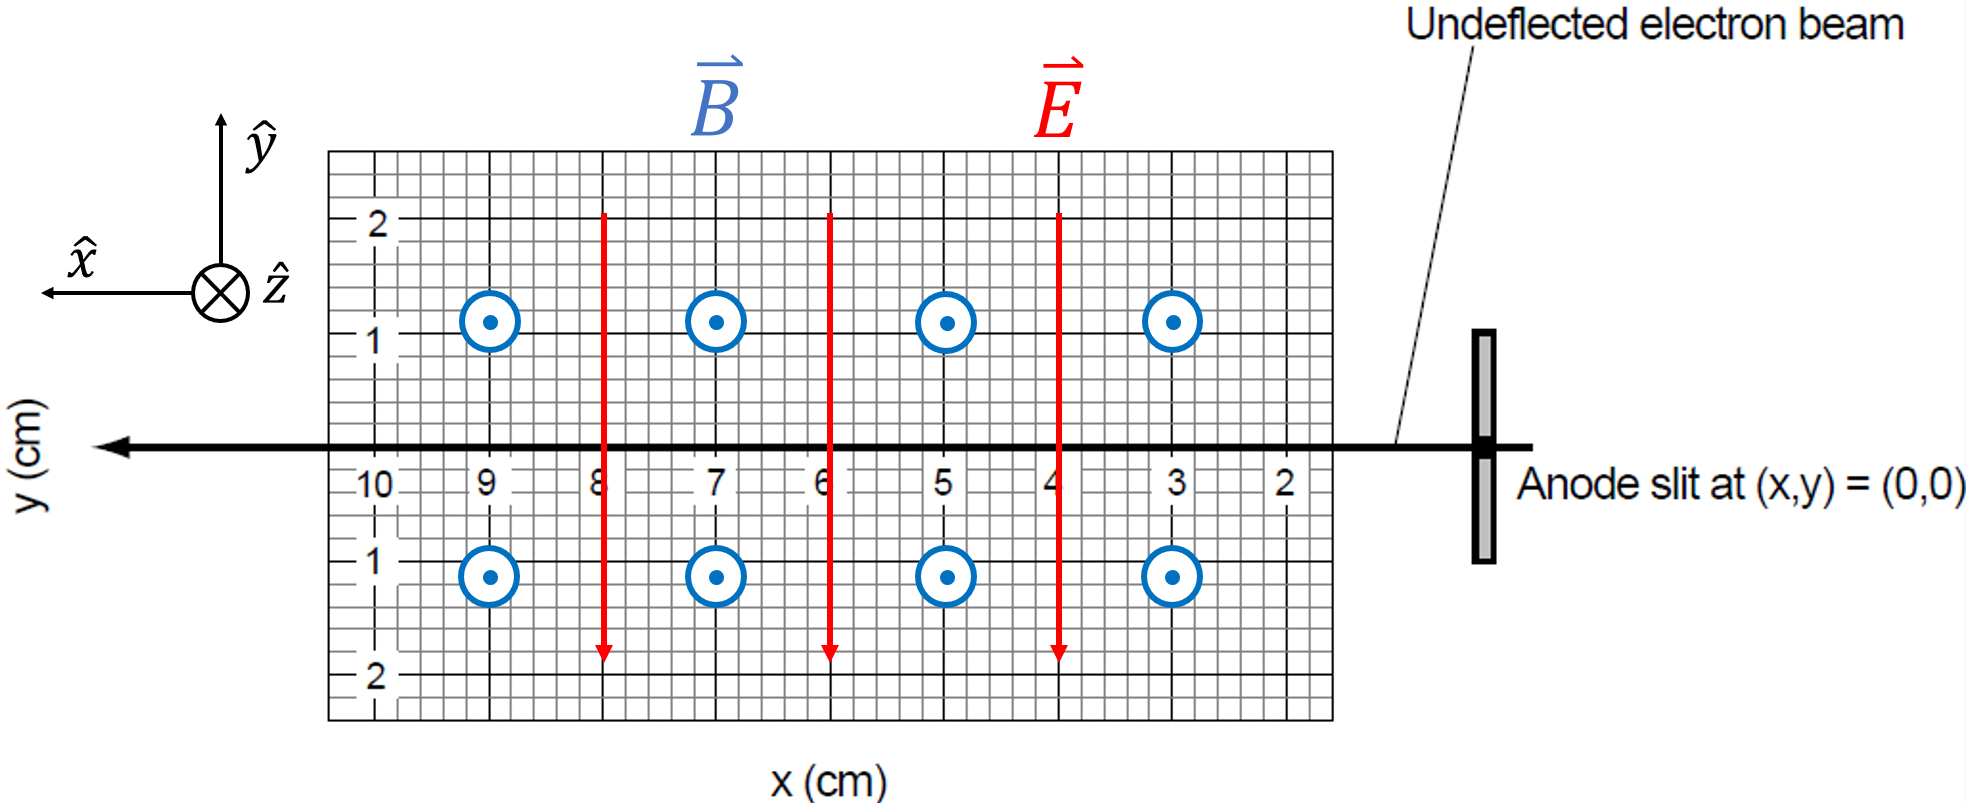

<strong><font color=A07A06> Code Task 7.2: Select electric and magnetic field vectors to simulate last week's experiment with the an undeflected electron beam. Input these vectors into the code below and verify the plots created describe an undeflected electron beam. *Hint: The directions should match what is shown in the figure above, and magnitudes determined by what causes an undeflected trajectory.*</font></strong>

In [ ]:
###################################
# Magnitude of the E-field in V/m
E_field_mag0 = 2e4
    ### Begin Edit ###
# E field vector field direction
E_field_dir = np.array([0.0,0.0,0.0])

# Magnitude of the B-field in T
B_field_mag0 = 0
# B-field vector field direction
B_field_dir = np.array([0.0,0.0,0.0])
    
E_field_vec = E_field_mag0*E_field_dir
B_field_vec = B_field_mag0*B_field_dir
    ### End Edit ###
#################################

x, y, z, t = run_particle_simulation(E_field_vec, B_field_vec)
plot_particle_simulation(x, y, z, t)
    
plt.show()

**<font color=Purple> Directions: Use the following code to change the magnitude of the electric and magnetic fields to answer the two questions that follow.</font>**

In [ ]:
E_field_slider = widgets.FloatSlider(description='E field magnitude:',value=E_field_mag0,min=10e3,max=50e3,step=10,readout_format='.2e',style={'description_width':'initial'})
B_field_slider = widgets.FloatSlider(description='B field magnitude:',value=B_field_mag0,min=1e-4,max=2e-3,step=1e-5,readout_format='.2e',style={'description_width':'initial'})

mybutton = widgets.Button(description='Run',button_style='')
mybox = HBox([E_field_slider,B_field_slider,mybutton])
out = widgets.Output()

def run_sim(target):
    with out:
        clear_output()
        x, y, z, t = run_particle_simulation(E_field_slider.value*E_field_dir, B_field_slider.value*B_field_dir)
        plot_particle_simulation(x, y, z, t)
        show_inline_matplotlib_plots()
    
mybutton.on_click(run_sim)

display(mybox,out)

<strong><font color=004D40> Problem 7.1: Does $\vec{F}_E >> \vec{F}_B$ differ significantly from $\vec{F}_E \sim \vec{F}_B$? If so, why?</font></strong>

_Write your answer here._

<strong><font color=004D40> Problem 7.2: Does $\vec{F}_E << \vec{F}_B$ differ significantly from $\vec{F}_E \sim \vec{F}_B$? If so, why?</font></strong>

_Write your answer here._

# <font color=Black>Part Two: Instrument Calibration</font>

<strong><font color=004D40> Problem 7.3: Before we use the experimental setups, they must first be set up and calibrated. In the previous lab, many of the measurements were taken based on the position of the electron's trajectory across the mica sheet. Using the previous figure, determine how precise the measurements could be (i.e., what was the smallest difference that could be measured using the Mica sheet)? Be *quantitative* in your response.</font></strong>

_Write your answer here._

**<font color=Black>The precision of the
    measurements determines the tolerance of the experimental setup. How well we calibrate the E and B fields affects the trajectory of the electron. However, if the trajectory of the electron changes by an amount smaller than the tolerance of the setup, then we cannot measure the change in the trajectory.</font>**

**<font color=Black>For our purposes, we'll just be considering calibration as adjustment of the orientation of the E and B fields (i.e., adjusting the direction these fields are pointing). Above we considered how changing the magnitudes of the E and B fields affect the trajectory. We will now consider how changing the direction of the E and B fields affects the trajectory. In the space below, we will simulate the effects of misalignment, and determine the degree to which the instruments should be calibrated.</font>**

**<font color=Purple> Directions: Next we will produce graphs/plots showing how varying the angle of misalignment affects your measured values. Specifically, there should be two plots: one showing the error in the final vertical component of position/deflection of the particle versus angle of misalignment for the electric field, and one showing the error in the final vertical component of position/deflection of the particle versus angle of misalignment for the magnetic field. For each plot, only one field should be misaligned at a time. This will allow for us to observe the effects of misalignment clearly.</font>**

**<font color=Black>Here is a figure showing how your code will misalign the magnetic and electric fields.</font>**

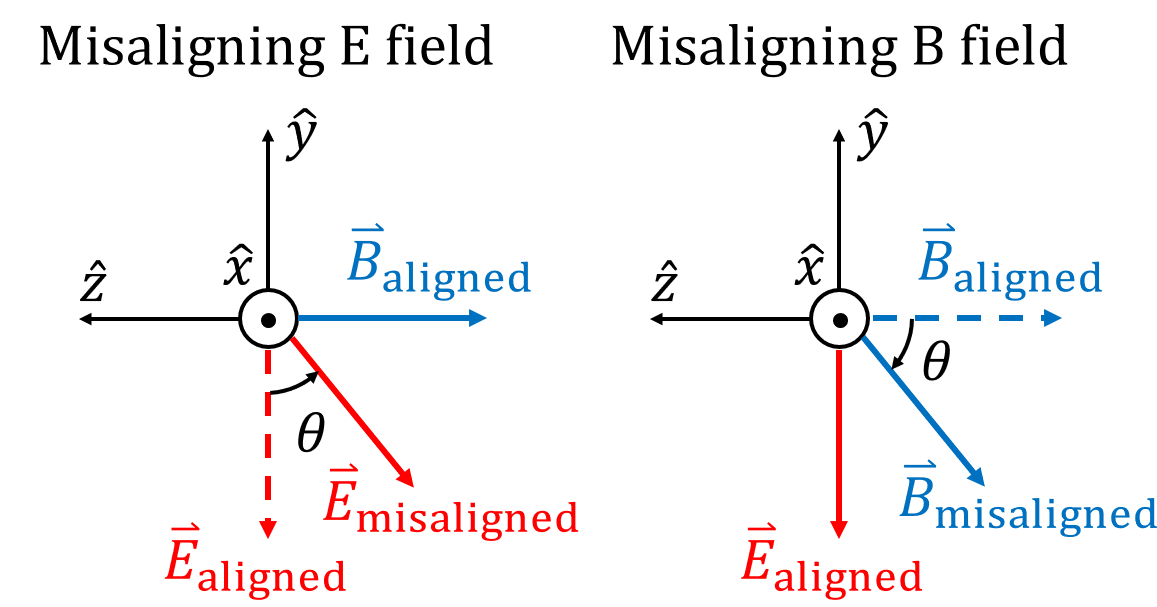

**<font color=Black>Finally, below we have provided an example piece of code for producing plots, which may be helpful for producing your own plots.</font>**

In [ ]:
#Example Plotting Code
x_data = [0,5,9,25]       #arbitrary x-data
y_data = [0.25,0.5,0.75,1.0]       #arbitrary y-data

plt.figure(figsize=(7,5))      #build the actual plot
plt.plot(x_data, y_data)    #make the actual plot
plt.xlabel('x data')    #give your x axis a label
plt.ylabel('y data')    #give your y axis a label
plt.title("The Title of my Figure")    #add a title to your figure
plt.show()

**<font color=Black> Code Task 7.3: [<font color=A07A06>Student 1</font> and <font color=004D40>Student 2</font>]<font color=Black> Use the following code cell to produce a plot of the final $y$ position measurement error vs. $\vec{E}$ misalignment angle. Below we have included an outline of this code.</font>**
* Lines 1-4 initiate an array of different misalignment angles we will test, from -$\pi/2$ to $\pi/2$, with 50 points.
* Lines 6-17 re-run the simulation from problem 7.2 since we want to compare the case of misalignment an experiment where the fields are correctly aligned.
* Line 21 initiates an array to contain the final y position for each $\theta_{mis}$ defined in the array from lines 1-4
* Line 25 begins an iteration over the angles defined in lines 1-4. The code `for angle in theta_list:` tells python to loop over every entry in `theta_list` and assign the variable name `angle` to the current entry. Iterators are very powerful in python because you don't need to worry about keeping track of indices as much, and it works on objects other than lists.
* <font color=red>Lines 28-37 are where we loop over the misalignment angles in `theta_list`. You have two goals inside of the loop and one outside the loop.<br>
    1. You must correctly define the directions of $\vec{E}$ and $\vec{B}$ by editing lines 29 and 31. We are interested in misaligning the $\vec{E}$ field, use `np.cos(angle)` and `np.sin(angle)` to do this. The $\vec{B}$ field should be correctly aligned. (29,31) <strong>NOTE: It is very important your fields are defined according to the figure at the beginning of part two.</strong>
    2. You must run the particle simulation from the function we defined and extract the final y position of the particle, `y_misaligned`. (35,37)</font>
* Finally, you must visualize your data by plotting it outside of the loop. For interpretation it might be helpful to convert `theta_list` to `degree_list` and plot the misalignment in degrees instead of radians. (42-46)

In [ ]:
theta_initial = -np.pi/2.0
theta_final = np.pi/2.0
# list of varying angles of misalignment
theta_list = np.linspace(theta_initial,theta_final,50) 

# From problem 7.2 E_field_mag0
E_field_mag0 = E_field_mag0
B_field_mag0 = B_field_mag0

E_field_dir = np.array([0.0,-1.0,0])
E_field_vec = E_field_mag0*E_field_dir
B_field_dir = np.array([0.0,0.0,-1.0])
B_field_vec = B_field_mag0*B_field_dir
print('Checking aligned fields for y reference.')
x, y, z, t = run_particle_simulation(E_field_vec, B_field_vec,verbose=False)
# selects the final y coordinate of the trajectory for properly aligned E and B fields
y_aligned = y[-1] 

### Copy code below for 7.7 ###
# create empty list to put errors in displacement once they are calculated
y_errors_E=[] 


# iterate through list of angles
for angle in theta_list:   
    print('Now checking angle theta_mis={}'.format(angle))
#####################################
    ### Edit Code Here ###
    E_field_dir = np.array([0.,0.,0.]) 
    E_field_vec = E_field_mag0*E_field_dir
    B_field_dir = np.array([0.0,0.0,0])
    B_field_vec = B_field_mag0*B_field_dir
    
    # call the run_particle_simulation function using your new field vectors
    
    # define y_misaligned as the final y coordinate from the simulation
    y_misaligned = 
    y_errors_E.append(y_aligned-y_misaligned)
    
print('Looping over angles complete, plotting data.')
plt.figure(figsize=(10,10))
#plotting goes here.




    ### End Edit ###
######################################

plt.show()

<strong><font color=Black> Code Task 7.4: [<font color=1E88E5>Student 3</font> and <font color=D81B60>Student 4</font>]<font color=Black>  Complete the code below to produce a plot of final $y$ position measurement error vs. misalignment angle in the case of a misaligned magnetic field. </font></strong>

In [ ]:
# Problem 7.7 <Code Task>
# repeat the above portion of code and adjust it for misaligning the magnetic field
# should output a plot similar to problem 7.6




plt.show()

<strong><font color=1E88E5> Problem 7.4: What value do we expect the error in y to take at misalignment angle = 0? Do your graphs agree with this expectation? Given this, why do we define the directions differently between the misaligned E field and the misaligned B field in the code above?</font></strong>

_Write your answer here._

# <font color=Black>Part Three: Summarizing Results</font>

**<font color=Black>The prep team could spend hours (or even days) calibrating instruments, making them more and more accurate/precise. However, they don't want to do that; after a certain point, further calibration won't be necessary.</font>**

<strong><font color=D81B60> Problem 7.5: In the space below, write a short note to the Lab Coordinator explaining:</strong><ul><li><strong>What you were trying to measure/determine</strong></li><li><strong>Your simulation and how you used it </strong></li><li><strong>Your results and recommendations for the degree of calibration needed for the previous week's lab. Justify your recommendation.</li></font></strong></font>

_Write your answer here._